In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
#Rebuild the data frame, which we used in the first PANDAS labs:
#the data frame should contain columns storing the student's ID, name, field of study and number of semesters
#data frame should contain 9 rows

list_2dim = [[100112,"Jim Collins","Wifo",4],[120095,"Martin Schrader","Wifo",7],[180331,"Achim Zahn","OMM",1],
            [100113,"Joan Collins","Wifo",5],[120096,"Martin Scorsese","ID",6],[180332,"Achim Loewer","OMM",3],
            [100114,"Jim Beam","Wifo",4],[120097,"Tim Schrader","Wifo",7],[180333,"Zacharias Maier","OMM",5]]

df = pd.DataFrame(list_2dim, columns=['ID','Name','FoS','Semesters'])
df

,ID,Name,FoS,Semesters
0,100112,Jim Collins,Wifo,4
1,120095,Martin Schrader,Wifo,7
2,180331,Achim Zahn,OMM,1
3,100113,Joan Collins,Wifo,5
4,120096,Martin Scorsese,ID,6
5,180332,Achim Loewer,OMM,3
6,100114,Jim Beam,Wifo,4
7,120097,Tim Schrader,Wifo,7
8,180333,Zacharias Maier,OMM,5


# One Hot Encoding

In [16]:
#one hot encoding of field of study
fos_oh_encoded = pd.get_dummies(df['FoS'], prefix='FoS',dtype=int)
fos_oh_encoded

,FoS_ID,FoS_OMM,FoS_Wifo
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,1,0,0
5,0,1,0
6,0,0,1
7,0,0,1
8,0,1,0


In [17]:
#join new features to original data frame and store result in df_oh
df_oh=df.join(fos_oh_encoded, lsuffix='_df', rsuffix='_df2')

In [18]:
df_oh

,ID,Name,FoS,Semesters,FoS_ID,FoS_OMM,FoS_Wifo
0,100112,Jim Collins,Wifo,4,0,0,1
1,120095,Martin Schrader,Wifo,7,0,0,1
2,180331,Achim Zahn,OMM,1,0,1,0
3,100113,Joan Collins,Wifo,5,0,0,1
4,120096,Martin Scorsese,ID,6,1,0,0
5,180332,Achim Loewer,OMM,3,0,1,0
6,100114,Jim Beam,Wifo,4,0,0,1
7,120097,Tim Schrader,Wifo,7,0,0,1
8,180333,Zacharias Maier,OMM,5,0,1,0


In [19]:
#Summarize the number of students per Field of Study in df_sum
#change the following line of code according to the field names in your data frame!
df_sum=df_oh.groupby(['FoS']).agg({'FoS_ID':'sum','FoS_OMM':'sum','FoS_Wifo':'sum'})
df_sum

,FoS_ID,FoS_OMM,FoS_Wifo
FoS,,,
ID,1,0,0
OMM,0,3,0
Wifo,0,0,5


<Axes: xlabel='FoS'>

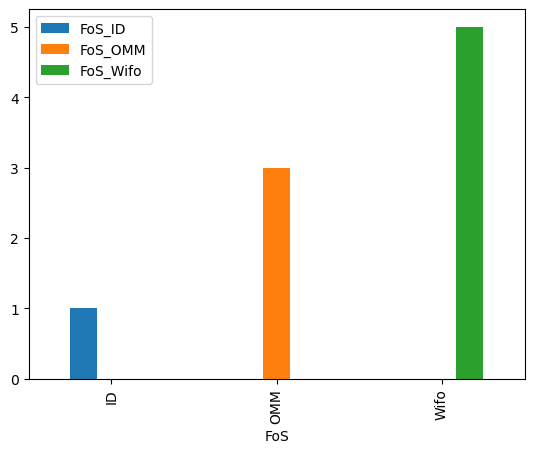

In [20]:
#display the number of students per field of study in a bar chart
#Hint: DataFrame.plot.bar can be used
df_sum.plot.bar()

# Target Encoding

In [21]:
#display the values of your original data frame again (the one without one hot encoding)
df

,ID,Name,FoS,Semesters
0,100112,Jim Collins,Wifo,4
1,120095,Martin Schrader,Wifo,7
2,180331,Achim Zahn,OMM,1
3,100113,Joan Collins,Wifo,5
4,120096,Martin Scorsese,ID,6
5,180332,Achim Loewer,OMM,3
6,100114,Jim Beam,Wifo,4
7,120097,Tim Schrader,Wifo,7
8,180333,Zacharias Maier,OMM,5


In [22]:
#Use "Semesters" as the target and apply target encoding to the feature "field of study"
#First step: calculate the mean number of semesters per "field of study"
mean_semesters_encode = df.groupby('FoS')['Semesters'].mean()
mean_semesters_encode

FoS
ID      6.0
OMM     3.0
Wifo    5.4
Name: Semesters, dtype: float64

In [23]:
#Create a new column for your data frame called 'Target Encoded FoS' and map the mean number of semesters, which you just calculated to this column
df['Target Encoded FoS']=df['FoS'].map(mean_semesters_encode)
df

,ID,Name,FoS,Semesters,Target Encoded FoS
0,100112,Jim Collins,Wifo,4,5.4
1,120095,Martin Schrader,Wifo,7,5.4
2,180331,Achim Zahn,OMM,1,3.0
3,100113,Joan Collins,Wifo,5,5.4
4,120096,Martin Scorsese,ID,6,6.0
5,180332,Achim Loewer,OMM,3,3.0
6,100114,Jim Beam,Wifo,4,5.4
7,120097,Tim Schrader,Wifo,7,5.4
8,180333,Zacharias Maier,OMM,5,3.0


In [24]:
#Drop new column again 
df.drop('Target Encoded FoS',axis=1,inplace=True)

# Ordinal Encoding

In [25]:
#Create a function that receives a string argument and returns the rank of the first character
#Example: Achim => 'A' => 1, Bernd => 'B' => 2 etc.
#Hint: the "ord" command could be helpful
def return_rank(name):
    return ord(name[0])-64

In [26]:
#loop the names in your data frame, call the rank function you just created and store the results in a list
name_ranks=[]
for name in df['Name']:
    name_ranks.append(return_rank(name))

In [27]:
#create a new column of your dataframe, which stores the values of the list you just created
df['Name Rank']=name_ranks
df

,ID,Name,FoS,Semesters,Name Rank
0,100112,Jim Collins,Wifo,4,10
1,120095,Martin Schrader,Wifo,7,13
2,180331,Achim Zahn,OMM,1,1
3,100113,Joan Collins,Wifo,5,10
4,120096,Martin Scorsese,ID,6,13
5,180332,Achim Loewer,OMM,3,1
6,100114,Jim Beam,Wifo,4,10
7,120097,Tim Schrader,Wifo,7,20
8,180333,Zacharias Maier,OMM,5,26


# Binning

In [28]:
#Apply binning to the name ranks which you just created
#There should be two bins
df['Name Bins']=pd.cut(df['Name Rank'], 2)
df

,ID,Name,FoS,Semesters,Name Rank,Name Bins
0,100112,Jim Collins,Wifo,4,10,"(0.975, 13.5]"
1,120095,Martin Schrader,Wifo,7,13,"(0.975, 13.5]"
2,180331,Achim Zahn,OMM,1,1,"(0.975, 13.5]"
3,100113,Joan Collins,Wifo,5,10,"(0.975, 13.5]"
4,120096,Martin Scorsese,ID,6,13,"(0.975, 13.5]"
5,180332,Achim Loewer,OMM,3,1,"(0.975, 13.5]"
6,100114,Jim Beam,Wifo,4,10,"(0.975, 13.5]"
7,120097,Tim Schrader,Wifo,7,20,"(13.5, 26.0]"
8,180333,Zacharias Maier,OMM,5,26,"(13.5, 26.0]"


In [29]:
#show different bins
df['Name Bins'].unique()

[(0.975, 13.5], (13.5, 26.0]]
Categories (2, interval[float64, right]): [(0.975, 13.5] < (13.5, 26.0]]

# Visual Normality Checks

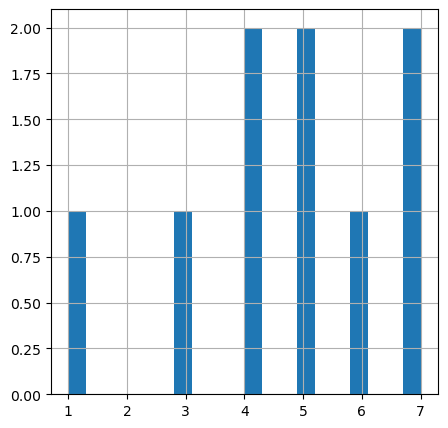

In [30]:
#create a histogram plot for the column "Semesters"
hist = df['Semesters'].hist(bins=20,figsize=(5, 5))

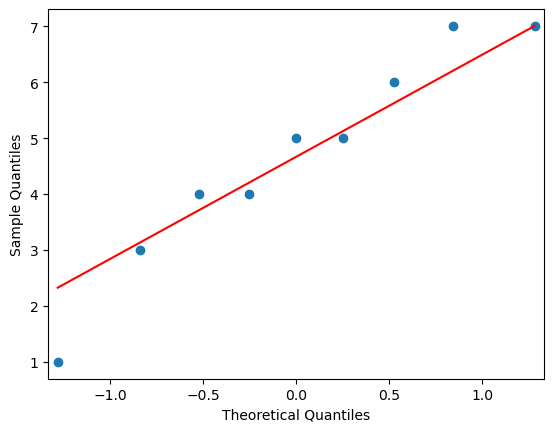

In [31]:
#create a qq plot for the column "Semesters"
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(df['Semesters'], line='s')
pyplot.show()

# Statistical Normality Checks

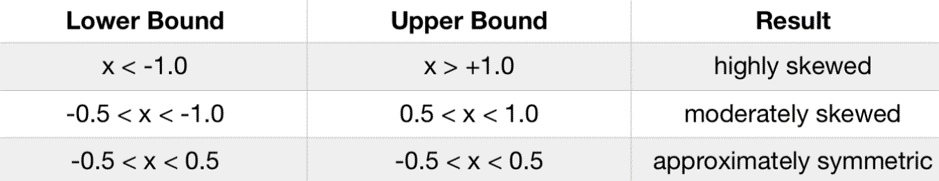

In [32]:
#Calculate skew for the column "Semesters"
df['Semesters'].skew()

-0.5901688908506545

In [33]:
# Shapiro-Wilk Test
from scipy.stats import shapiro

def shapiro_wilk_test(data,alpha):
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.5f' % (stat, p))
    # interpret
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')      

In [34]:
#Perform Shapiro-Wilk Test for the column "Semesters"
shapiro_wilk_test(df['Semesters'],0.05)

Statistics=0.944, p=0.62039
Sample looks Gaussian (fail to reject H0)


# Transform to normal distribution - Quantile Transformer

In [35]:
from sklearn.preprocessing import QuantileTransformer

<Axes: >

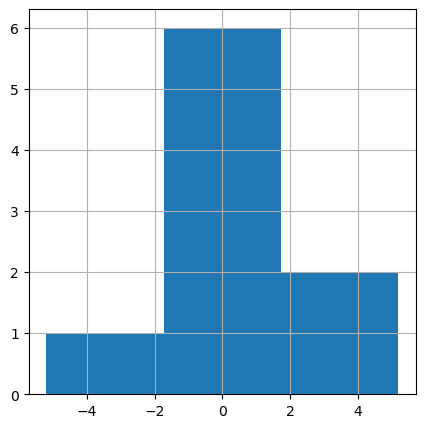

In [36]:
#perform quantile transformation for the column "Semesters" and plot the result in a histogram
#quanitel transformer should use 5 quantiles
qt = QuantileTransformer(n_quantiles=5, output_distribution='normal',random_state=0)
trans_x=qt.fit_transform(np.array(df['Semesters'].array.reshape(-1, 1)))

df['Semesters qtransformed']=trans_x

#histogram should use 3 bins
df['Semesters qtransformed'].hist(bins=3,figsize=(5, 5))